In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle


In [338]:
train_data = pd.read_csv('data/3/train.csv')
X_train = train_data['x'].values
Y_train = train_data['y'].values

$$\hat{\beta} = (X^TX)^{-1}X^Ty$$

In [339]:
def get_weights(degree):
    polyX = np.array([X_train**i for i in range(degree+1)]).T
    polyXT = polyX.T
    inv = np.linalg.inv(polyXT @ polyX)
    beta = inv @ polyXT @ Y_train
    return beta 

In [340]:
degree = 20
beta = get_weights(degree)
# np.save('3_weights.pkl', beta)
with open('3_weights.pkl', 'wb') as f:
    pickle.dump(beta, f)

In [341]:
test_data = pd.read_csv('data/3/test.csv')
id_test = test_data['id'].values
X_test = test_data['x'].values

# n = len(X_train)
# n //= 10
# X_test = X_train[0:n]
# Y_test = Y_train[0:n]
# X_train = X_train[n:]
# Y_train = Y_train[n:]

In [342]:
def test(degree, use_saved_weights=False):
    if use_saved_weights:
        beta = np.load('3_weights.pkl', allow_pickle=True)
    else:
        beta = get_weights(degree)
    polyX = np.array([X_test**i for i in range(degree+1)]).T
    Y_pred = polyX @ beta
    return Y_pred

In [343]:
Y_pred = test(degree, use_saved_weights=True)
#save the predictions to a csv file as id, x, y
df = pd.DataFrame({
    'id': id_test,
    'x': X_test,
    'y': Y_pred
})

df.to_csv('3_predictions.csv', index=False)

Helper functions for calculating $SS_R$ and $R^2$. Also, drawing the plot of degree vs $R^2$ to get a idea

[(1, 0.7330450526346313), (2, 0.7681782934569068), (3, 0.8415922562985076), (4, 0.9014525202306997), (5, 0.9057888113973666), (6, 0.9059245799284678), (7, 0.9059301885992934), (8, 0.9059393184557233), (9, 0.9066252830932888), (10, 0.9066551395877668), (11, 0.9066644529227643), (12, 0.9069126737340505), (13, 0.9070264402681002), (14, 0.9074426516476561), (15, 0.907572407927248), (16, 0.9087450352406656), (17, 0.909219995824554), (18, 0.9102514416889049), (19, 0.910873076445787), (20, 0.9111231737016197), (21, 0.9104013078093646), (22, 0.9111940499520513), (23, 0.669955463401541), (24, -0.597115616086928), (25, -677.3341390902359), (26, -8.70231630272218), (27, -86.57886104954085), (28, -5.845924830924688), (29, -27.00053778743317), (30, -26.94219107892827), (31, -340.7736122951919), (32, -277.9781896674995), (33, -63969.958378102245), (34, -14399.366910100898), (35, -2978.5459743505508), (36, -68491217.90581486), (37, -40639.541272159084), (38, -11568.709670538135), (39, -14020.16936367

(-1.0, 1.0)

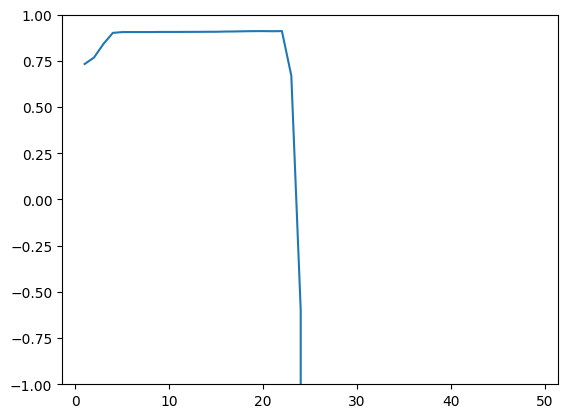

In [344]:
def ssr(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

def r2(y_true, y_pred):
    ssr_value = ssr(y_true, y_pred)
    ssy = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ssr_value / ssy

# Calculate SSR and R^2 for the model
def r2_ssr_degree(degree):
    beta = get_weights(degree)
    polyX = np.array([X_train**i for i in range(degree+1)]).T
    y_train_pred =  polyX @ beta
    ssr_value = ssr(Y_train, y_train_pred)
    r2_value = r2(Y_train, y_train_pred)
    return ssr_value, r2_value

r2_values = []
for degree in range(1,50):
    output = r2_ssr_degree(degree)
    r2_values.append(output[1])
    # print(f'Degree: {degree}, SSR: {output[0]}, R^2: {output[1]}')
    
# plot r2 values for different degrees
#limitin the y-axis to -1 to 1
print([(i+1, x) for i, x in enumerate(r2_values)])
plt.plot(range(1,50), r2_values)
plt.ylim(-1, 1)


In [345]:
def part_b_c(degree):
    print(f'Degree: {degree}, SSR: {r2_ssr_degree(degree)[0]}, R^2: {r2_ssr_degree(degree)[1]}')
    Y_pred = test(degree)
    
    plt.scatter(X_train, Y_train, color='blue', label='Train Data')
    plt.plot(np.sort(X_test), Y_pred[np.argsort(X_test)], color='red', label=f'Polynomial Degree {degree}')
    plt.legend()


Degree: 3, SSR: 396409.7627364374, R^2: 0.8415922562985076


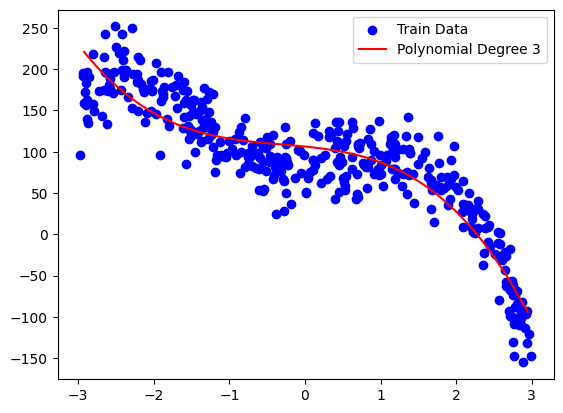

In [346]:
#Underfit for degree 1,2,3
part_b_c(3)
plt.savefig('../images/3/3_underfit.png')

Degree: 20, SSR: 222411.10694752348, R^2: 0.9111231737016197


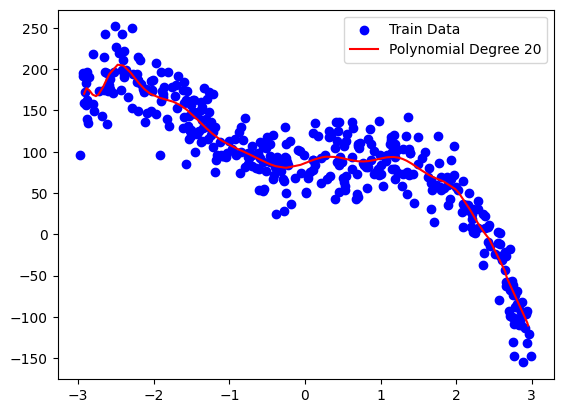

In [347]:
#correct fit for degrees 18 to 22
part_b_c(20)
plt.savefig('../images/3/3_correctfit.png')

Degree: 24, SSR: 3996725.208262113, R^2: -0.597115616086928


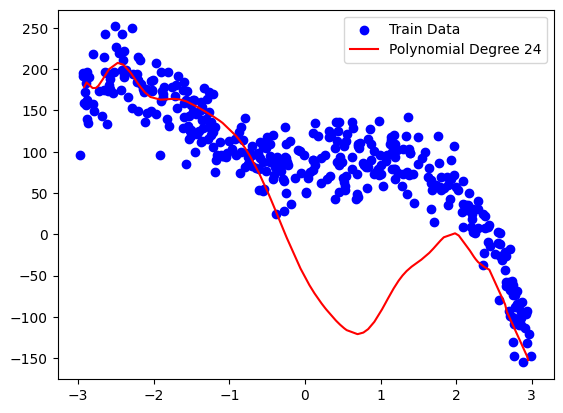

In [348]:
#overfit for degrees from 23 to 50
part_b_c(24)
plt.savefig('../images/3/3_overfit.png')